#### Libraries

In [45]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

![1](https://www.further.co.uk/wp-content/uploads/2019/04/onlineshoppers002.jpg)

##### Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoidany tendency to a specific campaign, special day, user profile, or period.

##### Dataset Origin:

https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

##### Source:

C. Okan Sakar
Department of Computer Engineering, Faculty of
Engineering and Natural Sciences, Bahcesehir University,
34349 Besiktas, Istanbul, Turkey

Yomi Kastro
Inveon Information Technologies Consultancy and Trade,
34335 Istanbul, Turkey

##### Relevant Papers

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

<a id="1"></a>
#### Importing Data

In [46]:
df = pd.read_csv("online_shoppers_intention.csv")

<a id="2"></a>
# First-Looking to Data And Analyzing

<a id="3"></a>
## First-Looking to DF

In [47]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<a id="4"></a>
## Information of the Dataset

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<hr>
         Administrative: This is the number of pages of this type (administrative) that the user visited.<br>
Administrative_Duration: This is the amount of time spent in this category of pages.<br>
          Informational: This is the number of pages of this type (informational) that the user visited.<br>
 Informational_Duration: This is the amount of time spent in this category of pages.<br>
         ProductRelated: This is the number of pages of this type (product related) that the user visited.<br>
ProductRelated_Duration: This is the amount of time spent in this category of pages.<br>
            BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.<br>
              ExitRates: The percentage of pageviews on the website that end at that specific page.<br>
             PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce<br>
             SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in<br>
                  Month: Contains the month the pageview occurred, in string form.<br>
       OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.<br>
                Browser: An integer value representing the browser that the user was using to view the page.<br>
                 Region: An integer value representing which region the user is located in.<br>
            TrafficType: An integer value representing what type of traffic the user is categorized into.<br>
            VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.<br>
                Weekend: A boolean representing whether the session is on a weekend.<br>
                Revenue: A boolean representing whether or not the user completed the purchase.<br>
<hr>

<br><br>Result Comments:<hr>

There are 10 numerical and 8 categorical(with Revenue) features.

Numericals: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRates, ExitRates, PageValues, SpecialDay.

On the other hand, Categoricals: Month, OperationgSystems, Browser, Region, TrafficType, VisitorType, Weekend, Revenue.

As a last, There is no any null value.

<a id="5"></a>
## Information About Numerical Values

In [49]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Comments:

Administrative: There is zero value as Min. It shouldn't.

For All Duration Parts: I will look the outliers values. Is there or not? The values of some of them is interesting thats why I’m saying.

Month: When we look at the months, the number of observations decreases after December.I will use just May, Nov, Mar, Dec months which are Top-4.


<a id="6"></a>
# Pre-Processing and Explotary Data Analysis(EDA)

<a id="7"></a>
## Numerical to Categorical

In [50]:
df["Month"] = df["Month"].astype("category")
df["OperatingSystems"] = df["OperatingSystems"].astype("category")
df["Browser"] = df["Browser"].astype("category")
df["Region"] = df["Region"].astype("category")
df["TrafficType"] = df["TrafficType"].astype("category")
df["VisitorType"] = df["VisitorType"].astype("category")
df["Weekend"] = df["Weekend"].astype("category")
df["Revenue"] = df["Revenue"].astype("category")

<a id="8"></a>
## Distribution of Categorical Features with Histogram

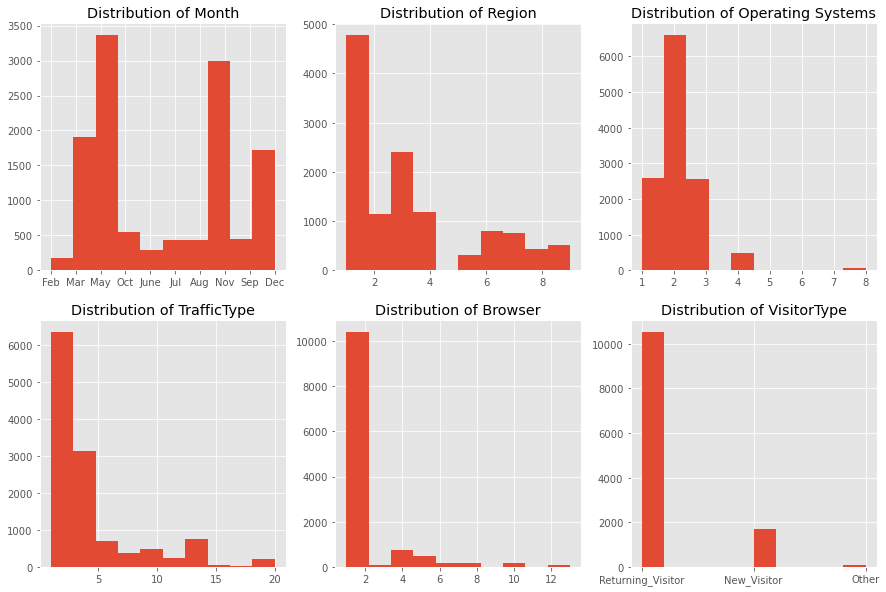

In [51]:
fig,((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

ax1.hist(df["Month"])
ax1.set_title("Distribution of Month")

ax2.hist(df["Region"])
ax2.set_title("Distribution of Region")

ax3.hist(df["OperatingSystems"])
ax3.set_title("Distribution of Operating Systems")

ax4.hist(df["TrafficType"])
ax4.set_title("Distribution of TrafficType")

ax5.hist(df["Browser"])
ax5.set_title("Distribution of Browser")

ax6.hist(df["VisitorType"])
ax6.set_title("Distribution of VisitorType")

plt.show()

I remove the features which are Operating Systems, Browser, Traffic Type and Region. Here are my reasons.

Operating Systems, Browser: I definitely think, the hardware or software of my system which do shopping on, Does not affect our shopping behavior.

Traffic Type and Region: They can affect our shopping behavior but There is not more information about them. Which number signifies what? on both of them.

<a id="9"></a>
## Month Setting

In [52]:
df = df[(df["Month"] == "Mar") | (df["Month"] == "May") | (df["Month"] == "Nov") | (df["Month"] == "Dec")]

<a id="10"></a>
## Administrative Settings

In [53]:
df = df[(df["Administrative_Duration"] > 0) | (df["Administrative"] > 0)]

<a id="11"></a>
## Dropping Some Columns

In [54]:
df = df.drop(["OperatingSystems","Browser","TrafficType","Region"], axis=1)

In [55]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Weekend,Revenue
186,2,9.000000,0,0.0,50,836.800000,0.000000,0.006340,0.000000,0.0,Mar,Returning_Visitor,False,False
187,10,293.778205,2,153.0,96,3283.166739,0.001961,0.013509,0.000000,0.0,Mar,Returning_Visitor,True,False
188,9,111.500000,1,48.5,49,1868.819697,0.000000,0.020709,1.706015,0.0,Mar,Returning_Visitor,False,True
189,3,47.000000,1,51.0,68,3008.124108,0.007143,0.016728,46.530175,0.0,Mar,Returning_Visitor,False,False
191,3,1226.000000,5,3.0,24,3230.250000,0.036190,0.096000,0.000000,0.0,Mar,Returning_Visitor,False,False


<a id="12"></a>
## Outliers and Removing Them

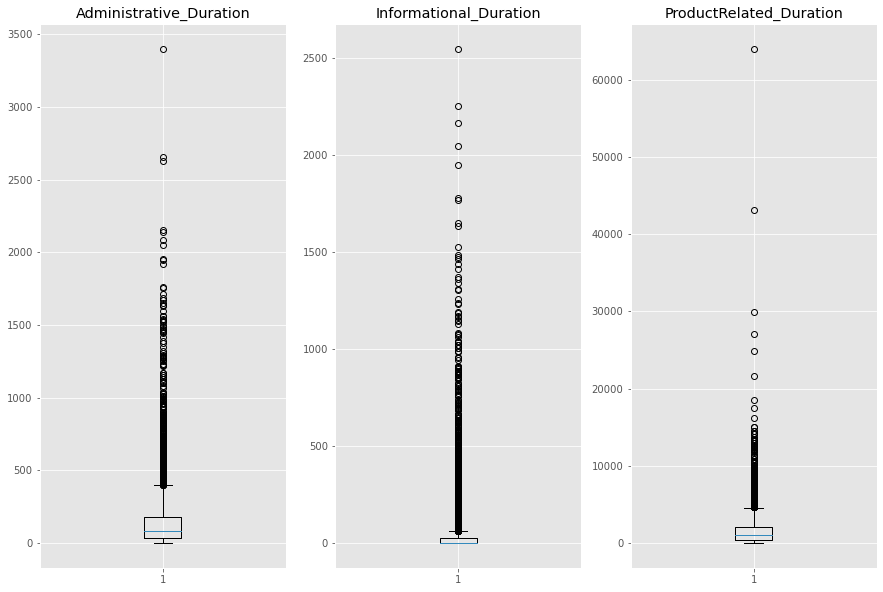

In [56]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.boxplot(df["Administrative_Duration"])
ax1.set_title("Administrative_Duration")

ax2.boxplot(df["Informational_Duration"])
ax2.set_title("Informational_Duration")

ax3.boxplot(df["ProductRelated_Duration"])
ax3.set_title("ProductRelated_Duration")


plt.show()

In [57]:
sorted_administrative = np.sort(df.Administrative_Duration)
q1, q3 = np.percentile(sorted_administrative, [25,75])
iqr = q3 - q1
upper_range_ad = q3 + (1.5*iqr)



sorted_informal = np.sort(df.Informational_Duration)
q1, q3 = np.percentile(sorted_informal, [25,75])
iqr = q3 - q1
upper_range_info = q3 + (1.5*iqr)



sorted_productrelated = np.sort(df.ProductRelated_Duration)
q1, q3 = np.percentile(sorted_informal, [25,75])
iqr = q3 - q1
upper_range_pro = q3 + (1.5*iqr)

df = df[(df["Administrative_Duration"] < upper_range_ad) | (df["Informational_Duration"] < upper_range_info) | (df["ProductRelated_Duration"] < upper_range_pro)]



<a id="13"></a>
## Correlation on Categoricals

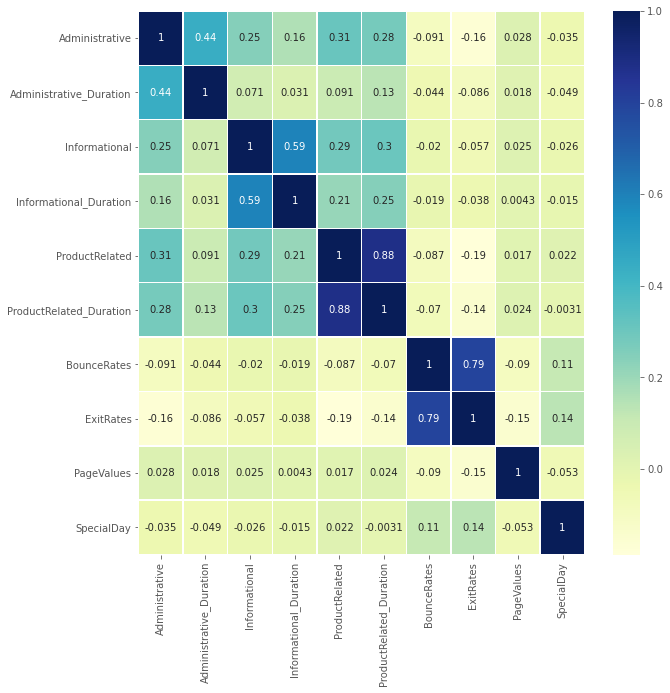

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, linewidths= .5, cmap="YlGnBu")
plt.show()

<a id="13"></a>
## Changing Type Of Some Columns to Prepare the Models

In [59]:
df.Month = df.Month.replace(["Mar","May","Nov","Dec"], ["3", "5", "9","12"])
df.Month = df.Month.astype("int")
df.VisitorType = df.VisitorType.replace(["Returning_Visitor", "New_Visitor","Other"], ["0","1","2"])
df.VisitorType = df.VisitorType.astype("int")
df.Weekend = df.Weekend.astype("int")
df.BounceRates = df.BounceRates.astype("int")
df.ExitRates = df.ExitRates.astype("int")
df.PageValues= df.PageValues.astype("int")
df.SpecialDay = df.SpecialDay.astype("int")
df.Revenue = df.Revenue.astype("int")

<a id="14"></a>
# Classification


### Creating The Dataset Like X and Y

In [60]:
X = df.drop(["Revenue"], axis=1)
y = df["Revenue"]

### Splitting Test-Train

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<a id="15"></a>
## Classification with SGD

<a id="21"></a>
### Creating SGD Model

In [62]:
sgd = SGDClassifier()

<a id="22"></a>
### Fitting the Model

In [63]:
sgd.fit(X_train,y_train)

SGDClassifier()

<a id="23"></a>
### Predict For Test Values

In [64]:
y_predicted = sgd.predict(X_test)

<a id="24"></a>
### Comparison the Real and Predicted Value(Accuracy)

In [80]:
accuracy_score(y_test, y_predicted)

0.8147396889790399

<a id="25"></a>
### Cross Validatiton

In [66]:
cross_valid_scores = cross_val_score(sgd, X_test, y_test, cv=10)
cross_valid_scores.mean()

0.7693969479683765

<a id="16"></a>
## Classification with MLP

<a id="26"></a>
### Creating MLP Model

In [67]:
clf = MLPClassifier(random_state=1, max_iter=100)

<a id="27"></a>
### Fitting the Model

In [68]:
clf.fit(X, y)

MLPClassifier(max_iter=100, random_state=1)

<a id="28"></a>
### Predict For Test Values

In [69]:
y_predicted = clf.predict(X_test)

<a id="29"></a>
### Comparison the Real and Predicted Value(Accuracy)

In [70]:
accuracy_score(y_test, y_predicted)

0.8147396889790399

<a id="30"></a>
### Cross Validatition

In [71]:
cross_valid_scores_mlp = cross_val_score(clf, X_test, y_test, cv=10)
cross_valid_scores_mlp.mean()

0.8032588711160139

<a id="31"></a>
## Classification with MLP(Different Hidden Layer Sizes))

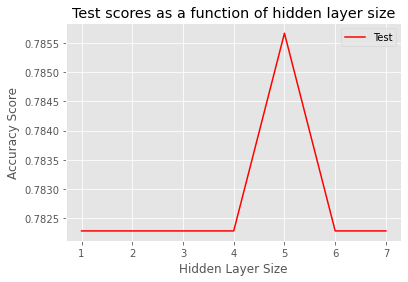

In [72]:
# To save test accuracy
score_list_test=list()

def MultiLayerPerceptron(number):
    global score_list_test
    global score_list_train

    
    # To split Train-Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
    
    # Crete hidden layer size tuple
    liste = list()
    for i in range(number, 0, -1):
        liste.append(2**i)
        
    # To create MLP model        
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=tuple(liste), random_state=1)
            
    # To apply
    clf.fit(X_train, y_train)
    

    # To predict test
    y_predicted = clf.predict(X_test)
    
    # Accuracy score of test
    score_test = accuracy_score(y_test, y_predicted)
    
    # To save the scores
    score_list_test.append(score_test)
    
    
# To call func.    
for i in range(1, 8):
    MultiLayerPerceptron(i)
    
# To plot
iteration = list(range(1,8))
plt.plot(iteration, score_list_test, color="red", label="Test")
plt.legend()
plt.title("Test scores as a function of hidden layer size")
plt.xlabel("Hidden Layer Size")
plt.ylabel("Accuracy Score")
plt.show()


<a id="17"></a>
# Clustering

<a id="18"></a>
## PCA

<a id="32"></a>
### Creating PCA Model

In [73]:
pca = PCA(n_components=13)

<a id="33"></a>
### Fitting

In [74]:
pca.fit(X)

PCA(n_components=13)

<a id="34"></a>
### Collect Explained Variance Ratio

In [75]:
explained_variance_ratio = pca.explained_variance_ratio_

<a id="35"></a>
### Plotting Explained Variance Ratio to choose PCA Component Number

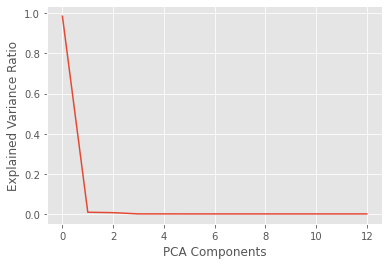

In [76]:
plt.plot(explained_variance_ratio)
plt.xlabel("PCA Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [77]:
print("PC1: {}\nPC2: {}".format(explained_variance_ratio[0], explained_variance_ratio[1]))

PC1: 0.9852078563481969
PC2: 0.008322339281403437


<a id="36"></a>
### Collect PC1 and PC2 X and Y Values

In [78]:
for_x = list()
for_y = list()

for i in range(len(pca.transform(X))):
    for_x.append(pca.transform(X)[i][0])
    for_y.append(pca.transform(X)[i][1])
    
pca_df = pd.DataFrame(for_x, columns=["X"])
pca_df["Y"] = for_y
    


<a id="37"></a>
### Plotting After Dimension Reduction

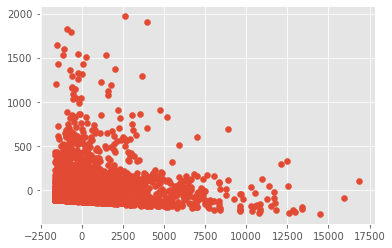

In [79]:
plt.scatter(pca_df["X"], pca_df["Y"])
plt.show()